In [1]:
from astropy.table import Table
from astropy.time import Time
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

def eclipse_time(N):
    return 2438708.3234 +.3207183*N

OFFSET = 2400000
data_table = Table.read('ocdatanew.csv')
print('before',data_table)
data_table.sort(['jd'])
print('after', data_table)
# 
time_of_eclipse = "2021-07-16 04:22:03"
astro_time = Time(time_of_eclipse)
observed_time = astro_time.jd

plt.style.use('sra_style.mplstyle') 

before         jd                   oc         
------------------ ---------------------
12741.677029098426  0.059341764522425317
12777.946176204823   0.07982114255448075
14403.068664442051    0.0645591614132345
15855.015222250064  0.026119073727760456
16955.173840075593  0.006296701230103174
 18804.96920606953  -0.02161732546374892
 20716.71637185569  -0.05219473961133883
22259.035017330214  -0.06739849497006026
 23679.89528952119  -0.07937415792911665
25318.024738694352  -0.09967385248372332
               ...                   ...
33553.812220024105  -0.14828660436137073
39351.729313050004  -0.02990654205607482
 19269.36807876845 -0.040031152647975105
 17794.93826318303 -0.004205607476635537
 15709.43902494486  0.041744548286604316
14636.605498328674   0.04252336448598126
13822.111558314577   0.05732087227414326
13416.376742388069   0.07211838006230525
  12295.7909816495   0.08925233644859809
  43135.7755190213 -0.015109034267912796
 41658.16222116107  0.005140186915887829
Length = 

56286.281238516654
59411.68197916681


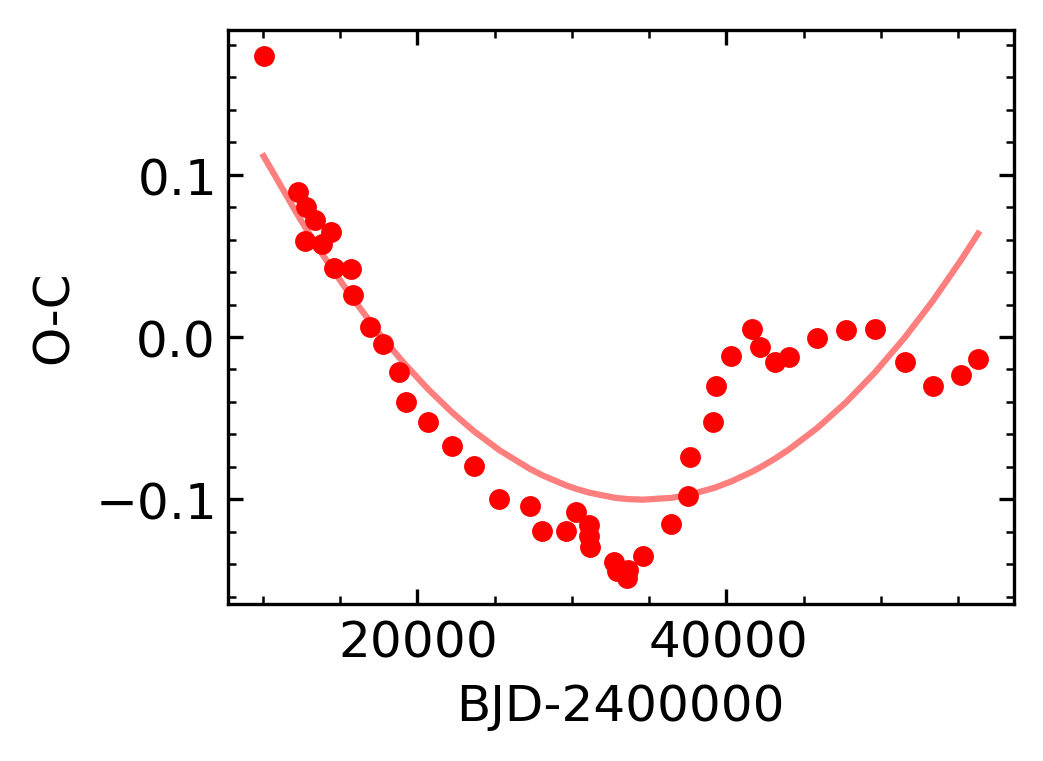

2021-07-16 04:22:03.000
2021-07-16 03:38:37.239
2459411.681979167 2459411.6518199 0.03015926666557789


In [8]:
z = np.polyfit(data_table['jd'], data_table['oc'], 2)
p = np.poly1d(z)
plt.plot(data_table['jd'], p(data_table['jd']), color='red', alpha=0.5)

plt.plot(data_table['jd'], data_table['oc'], 'o', color='red')
plt.xlabel('BJD-2400000')
plt.ylabel('O-C')


print(np.max(data_table['jd']))
print(observed_time-OFFSET)
plt.show()
print(Time(observed_time,format='jd').iso)
print(Time(eclipse_time(64553),format='jd').iso)
calculated_time = eclipse_time(64553)
print(observed_time, calculated_time, observed_time-calculated_time)

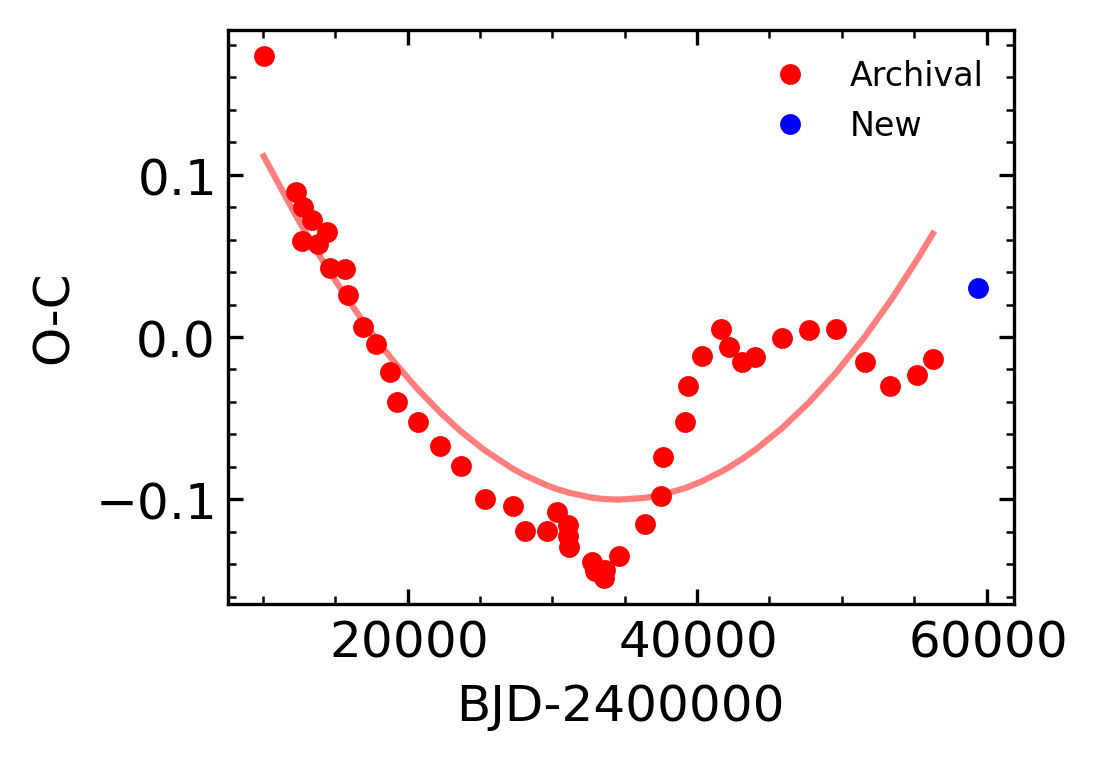

In [9]:
plt.plot(data_table['jd'], data_table['oc'], 'o', color='red', label='Archival')
plt.plot(data_table['jd'], p(data_table['jd']), color='red', alpha=0.5)
plt.plot([calculated_time-OFFSET],[observed_time-calculated_time],'o',color='blue', label='New')
plt.legend()
plt.xlabel('BJD-2400000')
plt.ylabel('O-C')
plt.savefig("oc_graph.png")
plt.show()